In [10]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [11]:
# Data Generation
x = np.linspace(-10, 10, 1000)
y_true = np.sinc(x)

n= len(x)
print(n)

step_size = 10  # Setting up desired step size

# Slice out a small number of points from the left side of the domain until x < 2.5 with a step size

mask = (x < 2.5) & (np.arange(len(x)) % step_size == 0)
x_data = x[mask]
y_data = y_true[mask]
print(x_data.shape, y_data.shape)

1000
(63,) (63,)


In [12]:
# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_true_tensor = torch.tensor(y_true, dtype=torch.float32).unsqueeze(1)
x_data_tensor = torch.tensor(x_data, dtype=torch.float32).unsqueeze(1)
y_data_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)

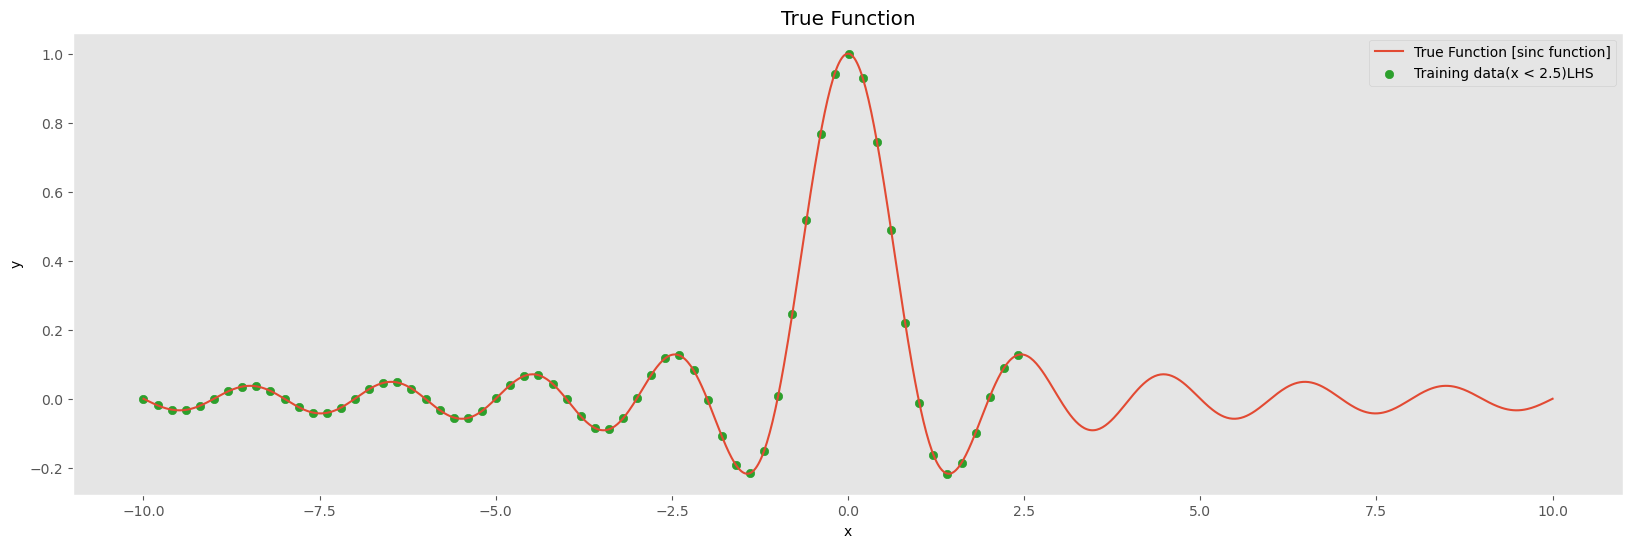

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Plot data without noise
plt.figure(figsize=(20, 6))
plt.plot(x, y_true, label='True Function [sinc function]')
plt.title('True Function')

plt.scatter(x_data, y_data, color="tab:green", label="Training data(x < 2.5)LHS")

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()
plt.show()

Optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
Epoch [100/1000], Loss: 0.0201
Epoch [200/1000], Loss: 0.0038
Epoch [300/1000], Loss: 0.0036
Epoch [400/1000], Loss: 0.0035
Epoch [500/1000], Loss: 0.0035
Epoch [600/1000], Loss: 0.0035
Epoch [700/1000], Loss: 0.0035
Epoch [800/1000], Loss: 0.0035
Epoch [900/1000], Loss: 0.0035
Epoch [1000/1000], Loss: 0.0035


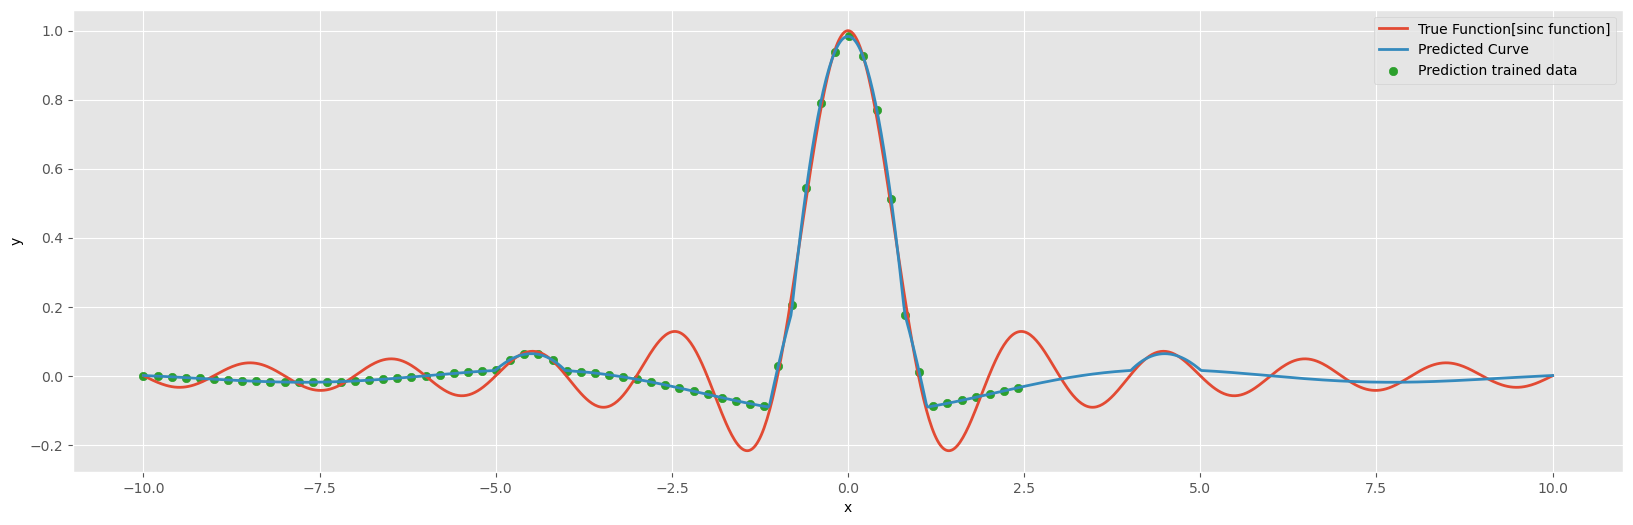

In [19]:
# Define the neural network model
class SincNet(nn.Module):
    def __init__(self):
        super(SincNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.sin(x) / x
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x    
    
# Instantiate the model
model = SincNet()

criterion = nn.MSELoss()                                   # Mean Squared Error (MSE) loss function measures the average squared difference between the predicted values and the true values
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Optimizer =", optimizer)  



# Combine x_tensor and x_data_tensor for training
combined_x_tensor = torch.cat((x_tensor, x_data_tensor), dim=0)
combined_y_tensor = torch.cat((y_true_tensor, y_data_tensor), dim=0)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(combined_x_tensor)
    loss = criterion(outputs, combined_y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')     
        

import numpy as np
import matplotlib.pyplot as plt

# Pass data through the model / Generate predictions
with torch.no_grad():
    y_pred_all = model(x_tensor).numpy()
    y_pred_data = model(x_data_tensor).numpy()  
       
plt.style.use('ggplot')
    
plt.figure(figsize=(20, 6))   
      
plt.plot(x, y_true, label='True Function[sinc function]', linewidth=2)
plt.plot(x, y_pred_all, label='Predicted Curve', linewidth=2)
plt.scatter(x_data, y_pred_data, color="tab:green", label="Prediction trained data")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()



    
    
    


1000
(63,) (63,)
Optimizer for Model 2 = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
Epoch [100/1000], Model 2 Loss: 0.0022
Epoch [200/1000], Model 2 Loss: 0.0014
Epoch [300/1000], Model 2 Loss: 0.0013
Epoch [400/1000], Model 2 Loss: 0.0012
Epoch [500/1000], Model 2 Loss: 0.0010
Epoch [600/1000], Model 2 Loss: 0.0012
Epoch [700/1000], Model 2 Loss: 0.0007
Epoch [800/1000], Model 2 Loss: 0.0006
Epoch [900/1000], Model 2 Loss: 0.0007
Epoch [1000/1000], Model 2 Loss: 0.0006


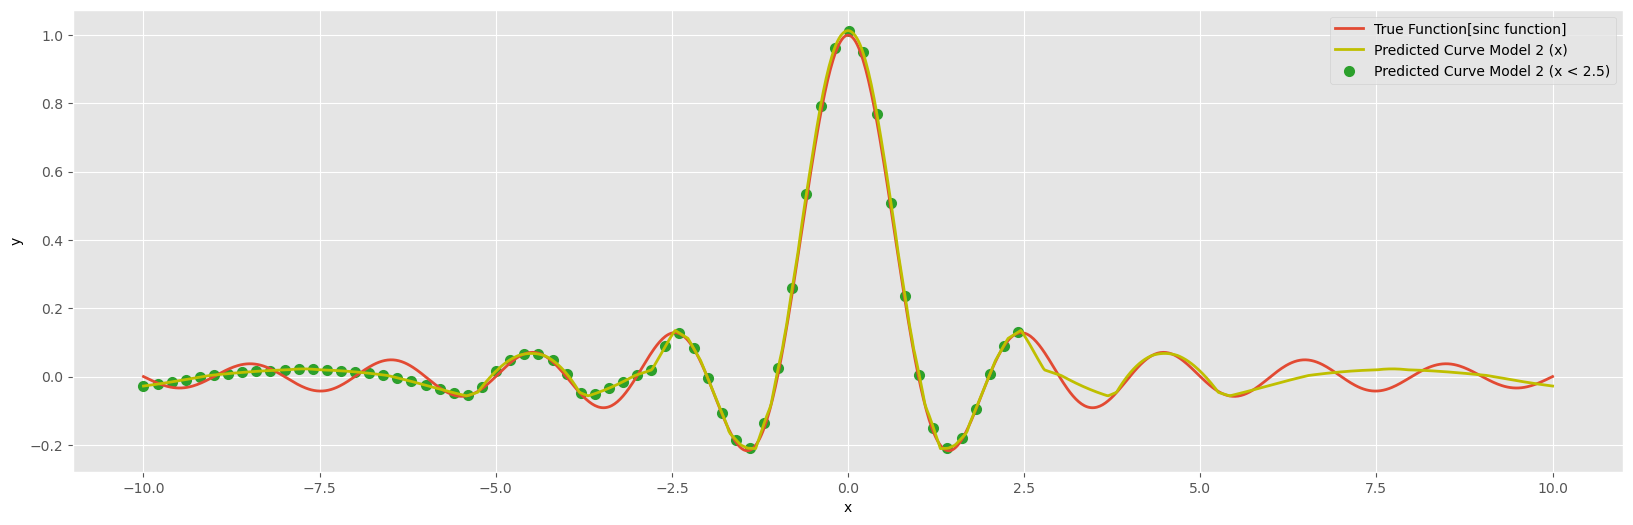

In [33]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
x = np.linspace(-10, 10, 1000)
y_true = np.sinc(x)

n = len(x)
print(n)

step_size = 10  # Setting up desired step size

# Slice out a small number of points from the left side of the domain until x < 2.5 with a step size
mask = (x < 2.5) & (np.arange(len(x)) % step_size == 0)
x_data = x[mask]
y_data = y_true[mask]
print(x_data.shape, y_data.shape)

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_true_tensor = torch.tensor(y_true, dtype=torch.float32).unsqueeze(1)
x_data_tensor = torch.tensor(x_data, dtype=torch.float32).unsqueeze(1)
y_data_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)

# Combine x_tensor and x_data_tensor for training
combined_x_tensor = torch.cat((x_tensor, x_data_tensor), dim=0)
combined_y_tensor = torch.cat((y_true_tensor, y_data_tensor), dim=0)

# Define the neural network model for model2
class SincNet2(nn.Module):
    def __init__(self):
        super(SincNet2, self).__init__()
        self.fc1 = nn.Linear(1, 40)
        self.fc2 = nn.Linear(40, 40)
        self.fc3 = nn.Linear(40, 40)
        self.fc4 = nn.Linear(40, 1)
    def forward(self, x):
        x = torch.sin(x) / x
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model for model2
model2 = SincNet2()

# Define the optimizer and criterion for model2
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)
criterion = nn.MSELoss()

print("Optimizer for Model 2 =", optimizer2)

# Train model2
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model2(combined_x_tensor)
    loss = criterion(outputs, combined_y_tensor)

    # Backward and optimize
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Model 2 Loss: {loss.item():.4f}')

# Pass x data and sliced data through model2
with torch.no_grad():
    y_pred_x = model2(x_tensor).numpy()
    y_pred_x_data = model2(x_data_tensor).numpy()

plt.style.use('ggplot')

plt.figure(figsize=(20, 6))

plt.plot(x, y_true, label='True Function[sinc function]', linewidth=2)

plt.plot(x, y_pred_x,color="y", label='Predicted Curve Model 2 (x)', linewidth=2)
plt.scatter(x_data[x_data < 2.5], y_pred_x_data,color="tab:green", label='Predicted Curve Model 2 (x < 2.5)', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()